Usage example of MediaPipe Face Mesh Solution API in Python (see also http://solutions.mediapipe.dev/face_mesh).

In [ ]:
!pip install mediapipe

     |████████████████████████████████| 32.7 MB 1.3 MB/s 


File Structure:
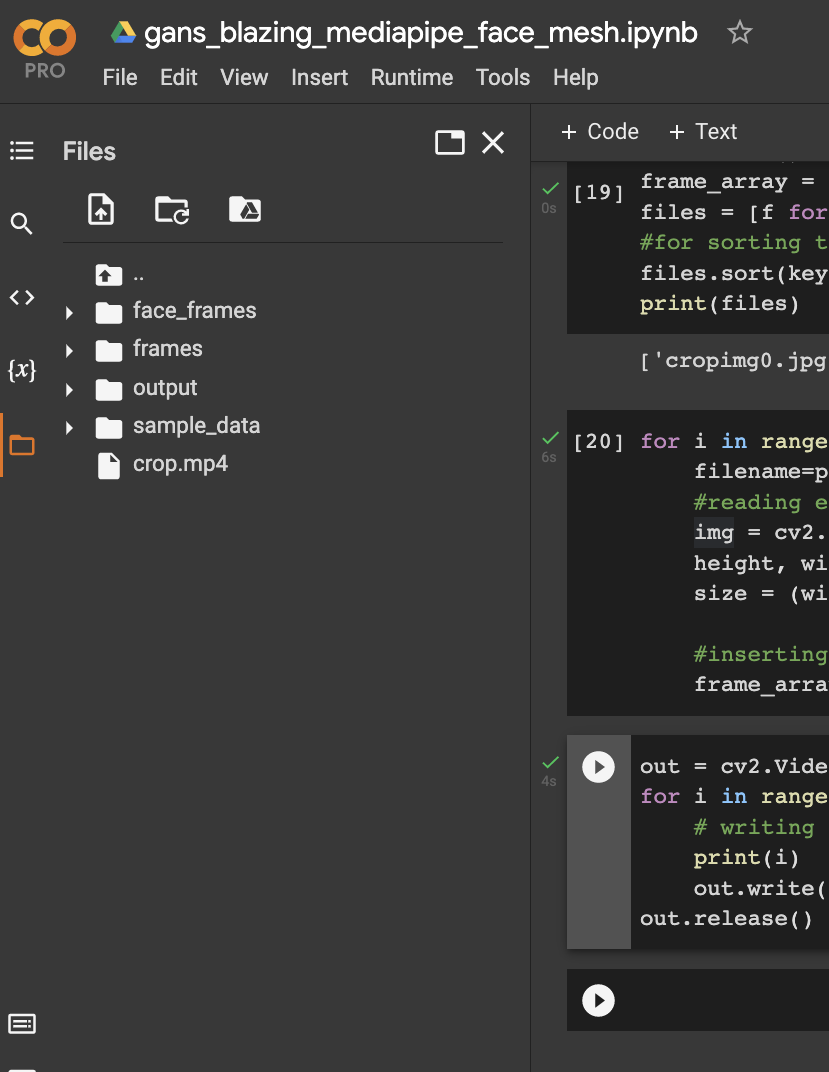

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
import os


def resize (image):
  width = 720
  height = 720
  dim = (width, height)
  # resize image
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  return resized


Split the video into indiv frames.

In [ ]:
# split frames
# define the color

# I made this file after watching this video
# https://www.youtube.com/watch?v=yKZ_A0XzXMU

def length_of_video(video_path):
  # smaller helper function
  cap = cv2.VideoCapture(video_path)
  length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  return length

def extracting_frames(video_path, save_path,skip_frames):
  # extract frames and save them as jpg
  # video_path: path to video
  # save_path : save_directory for extracted images
  # skip_frames: save every "X" frames

  print("Extracting Frames")

  # Windows OS format
  # C;\temp\video.mp4 = C:\temp,video.mp4
  _, file_name = os.path.split(video_path)

  # tabby.mp4 = [tabby,.mp4]
  file_name_without_ext = os.path.splitext(file_name)[0]

  # check length
  length = length_of_video(video_path)
  if length == 0:
    print('Length is 0, exiting extracting phase')
    return 0

  cap = cv2.VideoCapture(video_path)
  count = 0 #keep count of frames
  added_string = "img" #DLC format


  # test first frame
  ret, frame= cap.read() #ret frame returned correctly
  test_file_path = os.path.join(
      save_path,
      file_name_without_ext[:] +\
      '{}{}.jpg'.format(added_string,count)
  )

  cv2.imwrite(test_file_path,frame)
  if os.path.isfile(test_file_path):
    print("Saving Test Frame Successfully" + " continuing Extraction Phase")

    count = 0
    while ret:
      ret,frame = cap.read()
      if ret and (count % skip_frames) == 0:
        cv2.imwrite(os.path.join(
            save_path,
            file_name_without_ext[:]+
            '{}{}.jpg'.format(added_string,count)),frame)
        count +=1
        print(count)
      else:
        count += 1
  else:
    print("Problem with Saving Test fRAME CV2 encoding, cannot save file")
    return 0

  cap.release()
  print("**********FINISHED EXTRACTION*************")


In [ ]:
!mkdir frames

In [ ]:
video = "crop.mp4"
save_path = 'frames/'
extracting_frames(video,save_path,skip_frames=1)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Face Mesh solution, we can access this module as `mp_face_mesh = mp.solutions.face_mesh`.

You may change the parameters, such as `static_image_mode`, `max_num_faces`, and `min_detection_confidence`, during the initialization. Run `help(mp_face_mesh.FaceMesh)` to get more informations about the parameters.

In [ ]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

help(mp_face_mesh.FaceMesh)

In [ ]:
# Load drawing_utils and drawing_styles
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [ ]:
!mkdir output

In [ ]:
# Run MediaPipe Face Mesh.
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    refine_landmarks=True,
    max_num_faces=1,
    min_detection_confidence=0.5) as face_mesh:
  for name in (os.listdir("frames/")):
    # Convert the BGR image to RGB and process it with MediaPipe Face Mesh.
    path = "frames/"+name
    image = cv2.imread(path)
    image = resize(image)
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face landmarks of each face.
    # print(f'Face landmarks of {name}:')
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite("output/"+name, annotated_image)

In [ ]:
!mkdir face_frames

In [ ]:
from os.path import isfile, join
pathIn= 'frames/'
pathOut = 'my_face.mp4'

# I'll use 10 to make the video run faster
fps = 40
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
files.sort()
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: int(x[7:-4]))
print(files)

['cropimg0.jpg', 'cropimg1.jpg', 'cropimg2.jpg', 'cropimg3.jpg', 'cropimg4.jpg', 'cropimg5.jpg', 'cropimg6.jpg', 'cropimg7.jpg', 'cropimg8.jpg', 'cropimg9.jpg', 'cropimg10.jpg', 'cropimg11.jpg', 'cropimg12.jpg', 'cropimg13.jpg', 'cropimg14.jpg', 'cropimg15.jpg', 'cropimg16.jpg', 'cropimg17.jpg', 'cropimg18.jpg', 'cropimg19.jpg', 'cropimg20.jpg', 'cropimg21.jpg', 'cropimg22.jpg', 'cropimg23.jpg', 'cropimg24.jpg', 'cropimg25.jpg', 'cropimg26.jpg', 'cropimg27.jpg', 'cropimg28.jpg', 'cropimg29.jpg', 'cropimg30.jpg', 'cropimg31.jpg', 'cropimg32.jpg', 'cropimg33.jpg', 'cropimg34.jpg', 'cropimg35.jpg', 'cropimg36.jpg', 'cropimg37.jpg', 'cropimg38.jpg', 'cropimg39.jpg', 'cropimg40.jpg', 'cropimg41.jpg', 'cropimg42.jpg', 'cropimg43.jpg', 'cropimg44.jpg', 'cropimg45.jpg', 'cropimg46.jpg', 'cropimg47.jpg', 'cropimg48.jpg', 'cropimg49.jpg', 'cropimg50.jpg', 'cropimg51.jpg', 'cropimg52.jpg', 'cropimg53.jpg', 'cropimg54.jpg', 'cropimg55.jpg', 'cropimg56.jpg', 'cropimg57.jpg', 'cropimg58.jpg', 'cropi

In [ ]:
# for all the images in the array, 
# resize them and then run the dlib model on them
# resize the image
width = 540
height = 1080
dim = (width, height)

for ig in range(0,len(files)):
  orig = cv2.imread("frames/"+files[ig])
  annotated = cv2.imread("output/"+files[ig])

  resized_orig = cv2.resize(orig, dim, interpolation = cv2.INTER_AREA)
  resized_annotated = cv2.resize(annotated, dim, interpolation = cv2.INTER_AREA)

  im_h = cv2.hconcat([resized_orig, resized_annotated])
  cv2.imwrite("face_frames/"+files[ig],im_h)

In [ ]:
from os.path import isfile, join
pathIn= 'face_frames/'
pathOut = 'my_face.mp4'

# I'll use 10 to make the video run faster
fps = 40
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: x[5:-4])
files.sort()
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
#for sorting the file names properly
files.sort(key = lambda x: int(x[7:-4]))
print(files)

['cropimg0.jpg', 'cropimg1.jpg', 'cropimg2.jpg', 'cropimg3.jpg', 'cropimg4.jpg', 'cropimg5.jpg', 'cropimg6.jpg', 'cropimg7.jpg', 'cropimg8.jpg', 'cropimg9.jpg', 'cropimg10.jpg', 'cropimg11.jpg', 'cropimg12.jpg', 'cropimg13.jpg', 'cropimg14.jpg', 'cropimg15.jpg', 'cropimg16.jpg', 'cropimg17.jpg', 'cropimg18.jpg', 'cropimg19.jpg', 'cropimg20.jpg', 'cropimg21.jpg', 'cropimg22.jpg', 'cropimg23.jpg', 'cropimg24.jpg', 'cropimg25.jpg', 'cropimg26.jpg', 'cropimg27.jpg', 'cropimg28.jpg', 'cropimg29.jpg', 'cropimg30.jpg', 'cropimg31.jpg', 'cropimg32.jpg', 'cropimg33.jpg', 'cropimg34.jpg', 'cropimg35.jpg', 'cropimg36.jpg', 'cropimg37.jpg', 'cropimg38.jpg', 'cropimg39.jpg', 'cropimg40.jpg', 'cropimg41.jpg', 'cropimg42.jpg', 'cropimg43.jpg', 'cropimg44.jpg', 'cropimg45.jpg', 'cropimg46.jpg', 'cropimg47.jpg', 'cropimg48.jpg', 'cropimg49.jpg', 'cropimg50.jpg', 'cropimg51.jpg', 'cropimg52.jpg', 'cropimg53.jpg', 'cropimg54.jpg', 'cropimg55.jpg', 'cropimg56.jpg', 'cropimg57.jpg', 'cropimg58.jpg', 'cropi

In [ ]:
for i in range(len(files)):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

In [ ]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
for i in range(len(frame_array)):
    # writing to a image array
    print(i)
    out.write(frame_array[i])
out.release()